# Lab 2: Convolution & Discrete Fourier Transform

In [2]:
import commonfunctions as cf # this a custom module found the commonfunctions.py
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from scipy import fftpack
from scipy.signal import convolve2d
from skimage.util import random_noise
from skimage.exposure import rescale_intensity

# Show the matlpotlib figures inside the notebook
%matplotlib inline

##### Helper functions:
cf.show_images(images, titles=None)
<br>
Given a list of images and -(optionally)- a list of titles, it plots them using matplotlib with their respective titles 

### Part 1
#### Understanding the Concept of Inverse DFT

In this part, we will construct matrices in the frequency domain and see how they look in the 2D space domain

In [3]:
# This function maps matrices from frequency to space then plots them
def plot_image_from_freq(freq_domain_mat):
    inverse_fft_mat = fftpack.ifft2(freq_domain_mat) # Inverse FFT is a fast version of inverse DFT
    # Due to approximations, the returned matrix contains complex numbers
    # So, we get the magnitude to be able to plot the image
    image = np.abs(inverse_fft_mat) 
    cf.show_images([image], titles=['Image in Space Domain'])

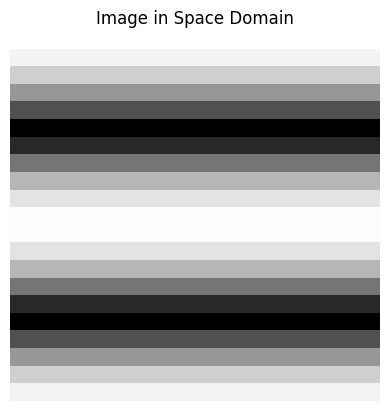

In [4]:
# We will first try to construct a matrix in the frequency domain that makes a vertically moving ripple in the space domain

freq_domain_mat = np.zeros([21,21])
freq_domain_mat[9, 10] = 1 # The choice of the value '1' is arbitrary
freq_domain_mat[11, 10] = 1
plot_image_from_freq(freq_domain_mat)
# In the frequency domain, positions along the vertical axis represent variation in the vertical direction. 
# Setting non-zero values at (9, 10) and (11, 10) indicates that we want a frequency component that oscillates along the y-axis. 
# When we perform the IFT on this matrix, it creates a vertical ripple in the spatial domain.

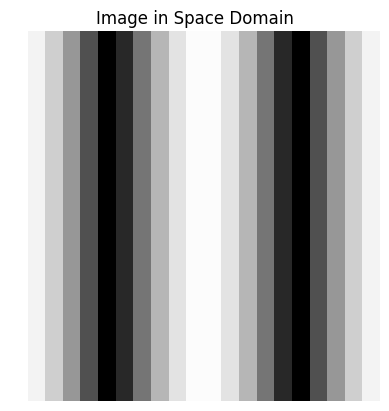

In [26]:
# TODO: construct a matrix in the frequency domain that makes a HORIZONTALLY moving ripple in the space domain

freq_domain_mat = np.zeros([21,21])
freq_domain_mat[10, 9] = 1
freq_domain_mat[10, 11] = 1
plot_image_from_freq(freq_domain_mat)
#Positions along the horizontal axis in the frequency domain correspond to variations in the horizontal direction. 
# Placing values at (10, 9) and (10, 11) means that we have components that oscillate horizontally.



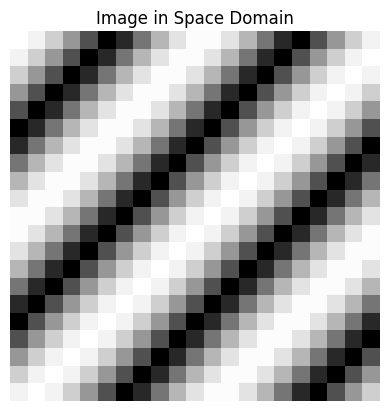

In [28]:
# Now a ripple moving diagonally
freq_domain_mat = np.zeros([21,21])
freq_domain_mat[9, 9] = 1
freq_domain_mat[11, 11] = 1
plot_image_from_freq(freq_domain_mat)
#When we set values at diagonal points, like (9, 9) and (11, 11), 
# we’re combining horizontal and vertical frequency components equally. This results in a pattern that varies diagonally.


# TO SUM UP
# Vertical Positioning in Frequency Domain :Vertical Ripple in Spatial Domain.
# Horizontal Positioning in Frequency Domain : Horizontal Ripple in Spatial Domain.
# Diagonal Positioning in Frequency Domain : Diagonal Ripple in Spatial Domain.

We recommend you try to construct different matrices like the previous ones and see if their space domain representation is what you expect

### Part 2
#### Understanding Image Filtering in the Frequency Domain

In this part, we will try to alter an image by multiplying it by a filter in the frequency domain.

In [7]:
# This function applies a filter to an image in the frequency domain
# and plots multiple images describing the process
def apply_filter_in_freq(img, f):
    img_in_freq = fftpack.fft2(img)
    
    # we supply the img shape here to make both the filter and img have the same shape to be able to multiply
    filter_in_freq = fftpack.fft2(f, img.shape)
    filtered_img_in_freq = np.multiply(img_in_freq, filter_in_freq)
    filtered_img = fftpack.ifft2(filtered_img_in_freq)
    
    cf.show_images([img,
                fftpack.fftshift(np.log(np.abs(img_in_freq)+1)), # log for better intensity scale, 
                                                                # shift to make zero freq at center
                fftpack.fftshift(np.log(np.abs(filter_in_freq)+1)),
                fftpack.fftshift(np.log(np.abs(filtered_img_in_freq)+1)),
                np.abs(filtered_img)
                ], ['Image', 'Image in Freq. Domain', 'Filter in Freq. Domain', 'Filtered Image in Freq. Domain', 'Filtered Image'])

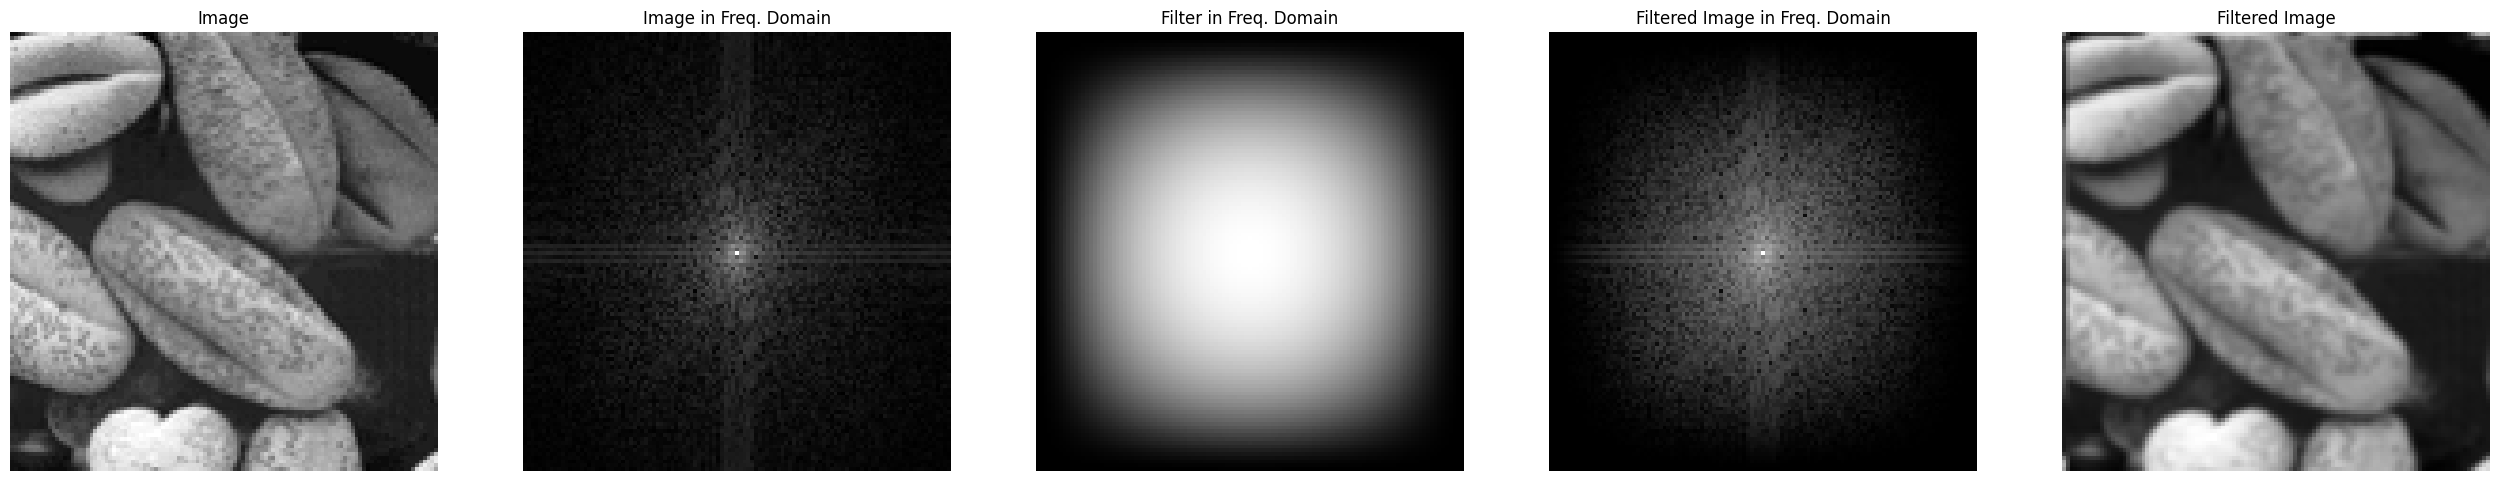

In [8]:
# Let's try some filters on a sample image
img = io.imread('imgs/Picture2.png')
if img.shape[-1] == 4:  # Check for alpha
    img = img[:, :, :3]  # take rgb
img = rgb2gray(img)
# img = rgb2gray((io.imread('imgs/Picture2.png')))

# This is a low pass filter (more on that in the upcoming lectures)
f=np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])

apply_filter_in_freq(img, f)
# The kernel here is symmetric and has positive values that sum up to a larger central value. 
# This specific pattern gives more weight to the center of the region being convolved while still averaging neighboring pixels.
# this filter produces a smoothing effect by averaging pixel values in a local neighborhood, reducing sharp transitions between pixels.

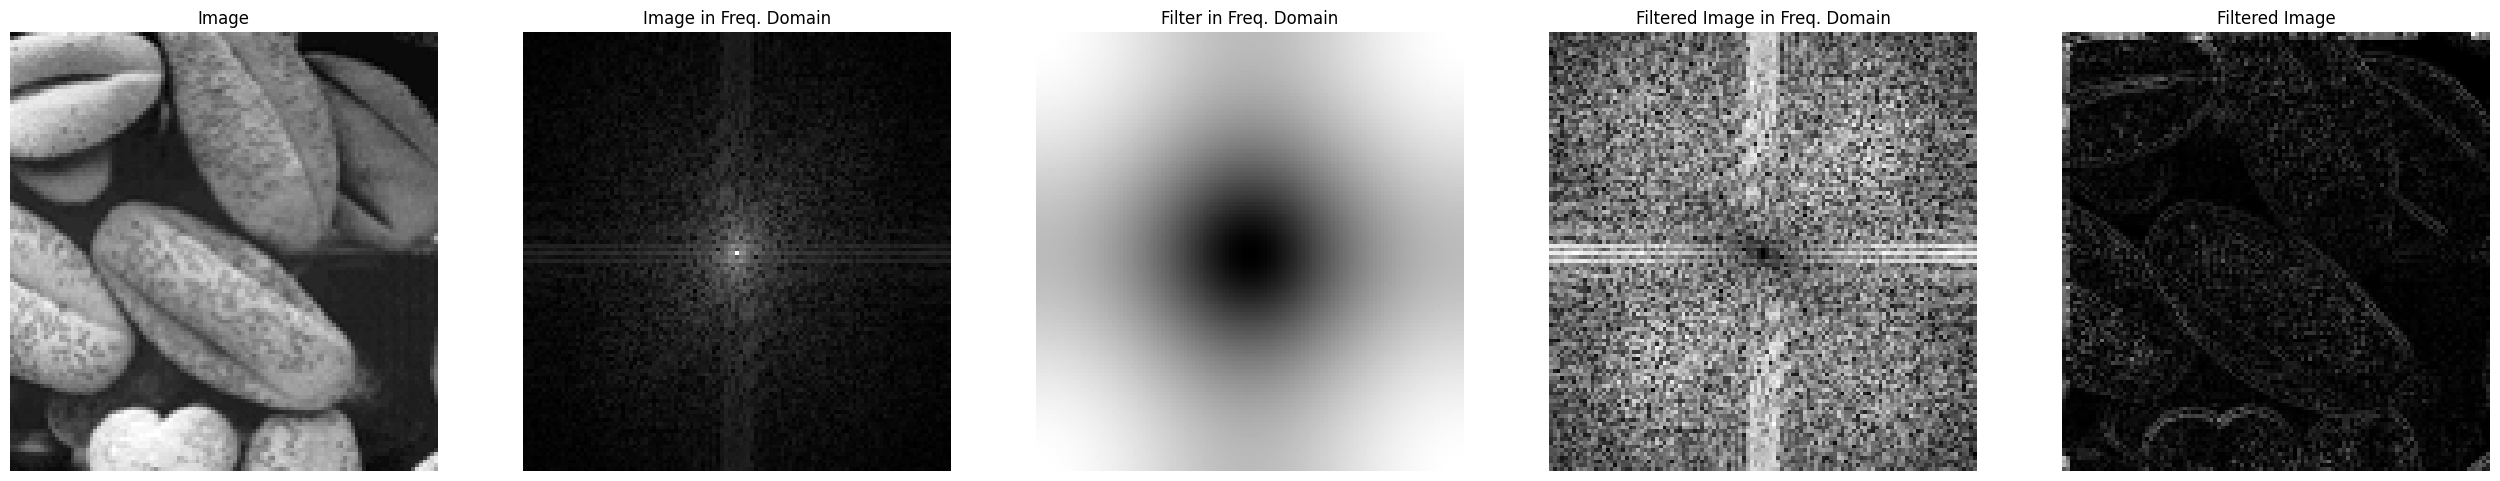

In [29]:
# This is a high pass filter (more on that in the upcoming lectures)
f=np.array([
    [ 0,-1, 0],
    [-1, 4,-1],
    [ 0,-1, 0]
])

apply_filter_in_freq(img, f)
# The positive central value highlight the pixel in focus, 
# while the surrounding negative values subtract neighboring pixels’ values.
#  This filter emphasizes sharp transitions, enhancing edges by highlighting places where there is a 
# significant difference in pixel values (which often indicates an edge).
# Usage: High pass filters are for edge detection, sharpening details.

#### TODO
What happened to the filtered images in the two previous examples and why?

Answer:<br>
LPF: Smooths the image by averaging, useful for noise reduction and blurring.<br>
HPF: Sharpens the image by emphasizing edges, useful for edge detection and enhancing details.

### Part 3
#### Understanding Image Filtering in the Space Domain Through Convolution 

In this part, you are required to convolve a couple of filters on imgs/bird.jpg which are shown in the next figure.

<img src='imgs/filters.PNG'></img>

#### Functions you might need:
-> convolve2d(img, f), for documentation: <br>

Visit this link (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)
<br>
Or
<br>
Press shift+tab after writing 'convolve2d' in a code cell

-> random_noise(img, mode) (https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise)

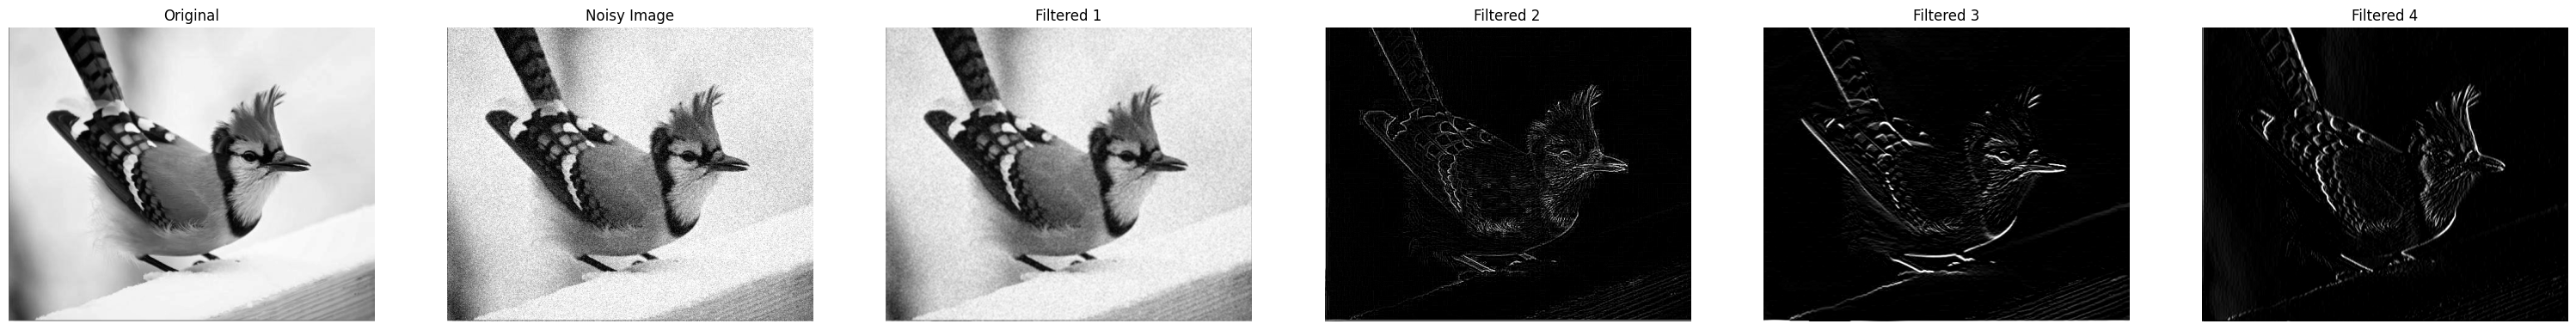

In [32]:
# TODO: Read an image and convert it to grayscale
img_birds = io.imread('imgs/bird.jpg')
if img_birds.shape[-1] == 4:
    img_birds = img_birds[:, :, :3] 
img_birds = rgb2gray(img_birds)

# TODO: Apply noise to the image and save it in another variable
noisy_img = random_noise(img_birds, mode='gaussian')

# TODO: Construct the required filters (hint: you can do it as we did in the previous part)
f1 = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])
# Purpose: This is an averaging filter, often used for smoothing and blurring.
# Uses: Reducing image noise, produce low-pass effect to remove high-frequency details.
f2 = np.array([
    [ 1,1, 1],
    [1, -8,1],
    [ 1,1, 1]
])
# Purpose: This is a high-pass filter used for edge detection.
# Uses: Detecting edges, isolating sharp transitions in the image, or enhancing details.
f3 = np.array([
    [ 1,1, 1],
    [0, 0, 0],
    [ -1, -1, -1]
])
# Purpose: This detects vertical edges.
# Uses: Identifying vertical edges in an image,  used in applications where detecting specific orientations of edges is important.
f4 = np.array([
    [ 1,0, -1],
    [1, 0,-1],
    [ 1,0, -1]
])
# Purpose: This filter is designed to detect horizontal edges.
# Uses: used for detecting horizontal edges, used in applications where detecting specific orientations of edges is important.


# TODO: Convolve the noisy image with f1 and the rest of the filters with the original image
img_f1 = convolve2d(noisy_img, f1, mode='same', boundary='wrap')
img_f2 = convolve2d(img_birds, f2, mode='same', boundary='wrap')
img_f3 = convolve2d(img_birds, f3, mode='same', boundary='wrap')
img_f4 = convolve2d(img_birds, f4, mode='same', boundary='wrap')
result_imgs = [img_birds, noisy_img, img_f1, img_f2, img_f3, img_f4]
result_labels = ['Original','Noisy Image', 'Filtered 1','Filtered 2','Filtered 3','Filtered 4']

# Show the images
cf.show_images([rescale_intensity(x, in_range=(0.0,1.0), out_range=(0, 255)) for x in result_imgs], result_labels)
# 	What are the uses of these filters?


# 	How can we modify the filter to make the output more descriptive?

# 1. Increase Filter size
# By increasing the filter size (5x5 or 7x7) the filter will cover a larger area of the image, 
# which can smooth larger areas and enhance more edges.

# 2Adjust filter Weights
# modifying the weights of the filter can help showing more of the effects
# For Smoothing such as f1: Increase the weight of the center value relative to the surrounding ones can create a more natural blur effect.
# For edge detection as f2 increase the central negative value will enhance the edges by making transitions between light and dark more distincit.
